In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 96% 409M/428M [00:06<00:00, 109MB/s]
100% 428M/428M [00:06<00:00, 73.0MB/s]


In [4]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [6]:
#organise the data into 2 list
paths = []
labels = []
import os
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        if len(paths) == 2800:
            break
print('Dataset is loaded')

Dataset is loaded


In [7]:
len(paths)

2800

In [8]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [9]:
#Create a DataFrame
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.sample(5)

,speech,label
1869,/content/tess toronto emotional speech set dat...,angry
1972,/content/tess toronto emotional speech set dat...,angry
702,/content/tess toronto emotional speech set dat...,sad
295,/content/tess toronto emotional speech set dat...,fear
2605,/content/tess toronto emotional speech set dat...,ps


In [10]:
df['label'].value_counts()

,count
label,
happy,400
fear,400
sad,400
neutral,400
disgust,400
angry,400
ps,400


In [11]:
df['label_count'] = df['label'].value_counts()
df.drop('label_count', axis=1)

,speech,label
0,/content/tess toronto emotional speech set dat...,happy
1,/content/tess toronto emotional speech set dat...,happy
2,/content/tess toronto emotional speech set dat...,happy
3,/content/tess toronto emotional speech set dat...,happy
4,/content/tess toronto emotional speech set dat...,happy
...,...,...
2795,/content/tess toronto emotional speech set dat...,ps
2796,/content/tess toronto emotional speech set dat...,ps
2797,/content/tess toronto emotional speech set dat...,ps
2798,/content/tess toronto emotional speech set dat...,ps


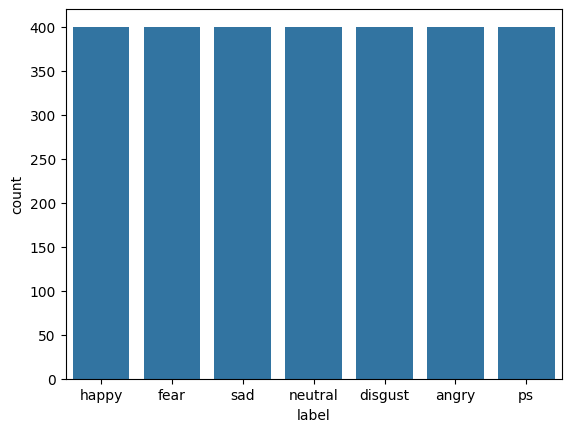

In [12]:
sns.countplot(x= df['label'])
plt.show()

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [14]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr) # Use waveshow instead of waveplot
    plt.show()

In [15]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [16]:
print(df.head())

                                              speech  label  label_count
0  /content/tess toronto emotional speech set dat...  happy          NaN
1  /content/tess toronto emotional speech set dat...  happy          NaN
2  /content/tess toronto emotional speech set dat...  happy          NaN
3  /content/tess toronto emotional speech set dat...  happy          NaN
4  /content/tess toronto emotional speech set dat...  happy          NaN


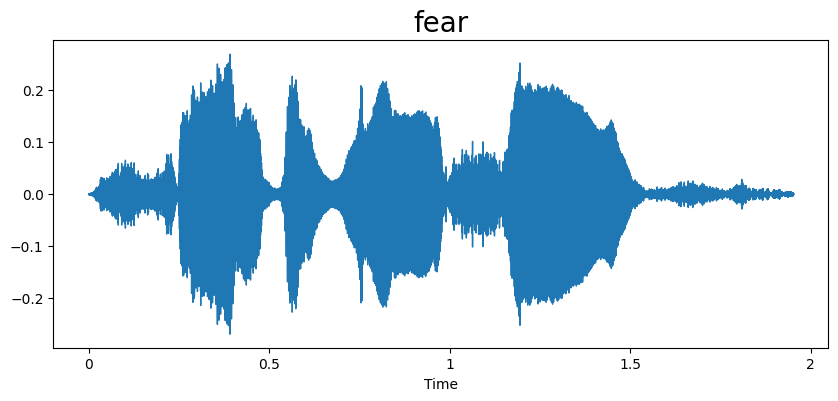

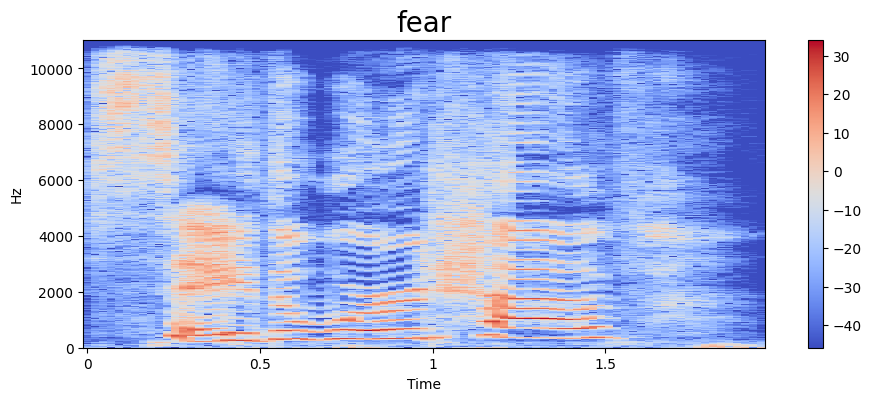

In [17]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

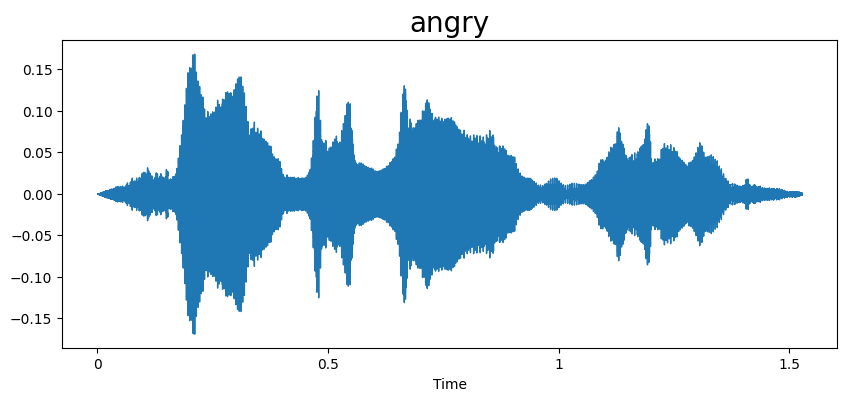

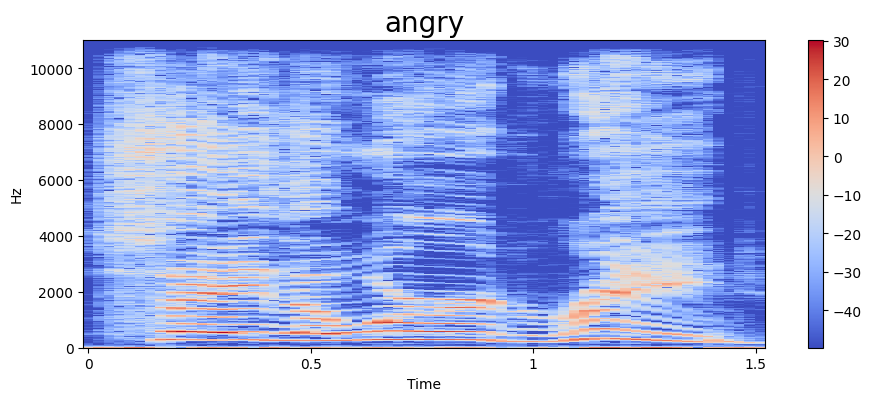

In [18]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

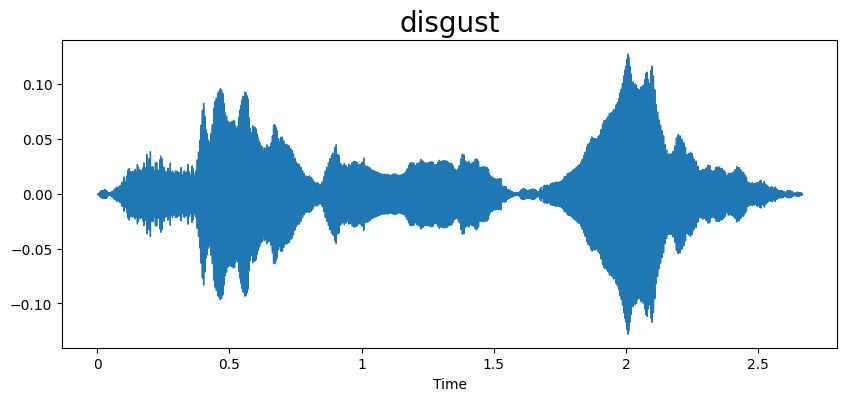

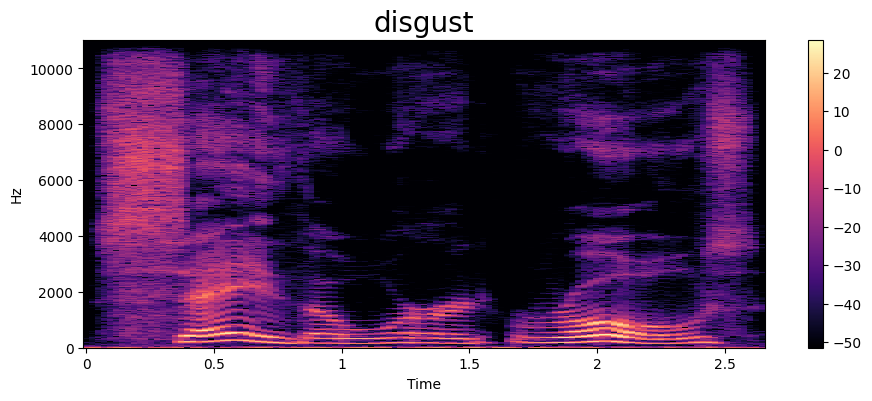

In [19]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

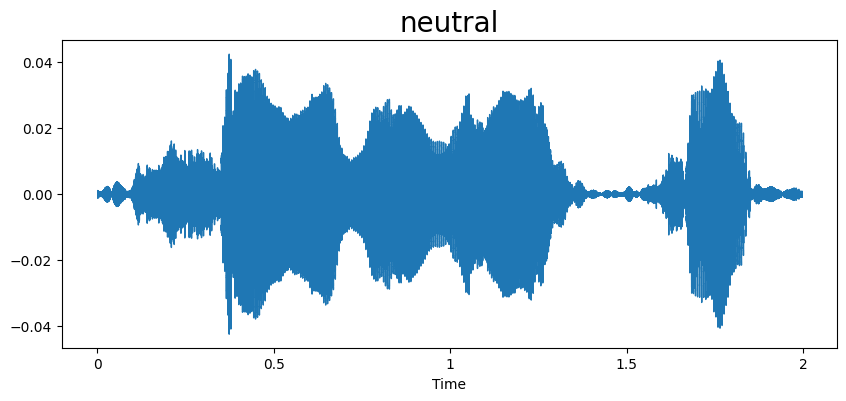

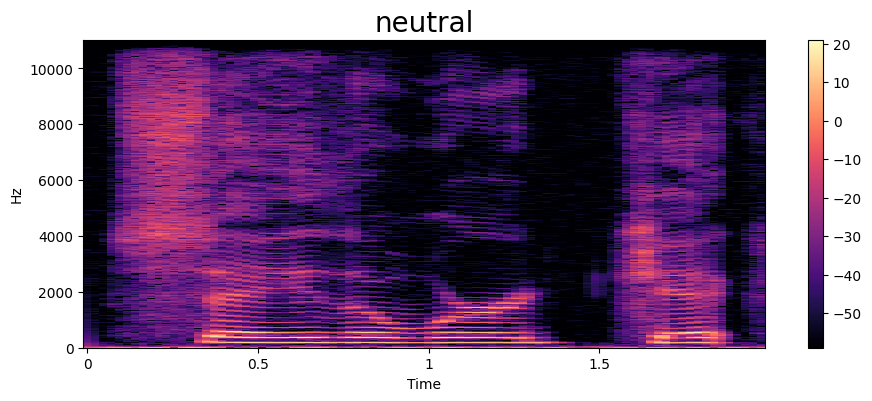

In [20]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

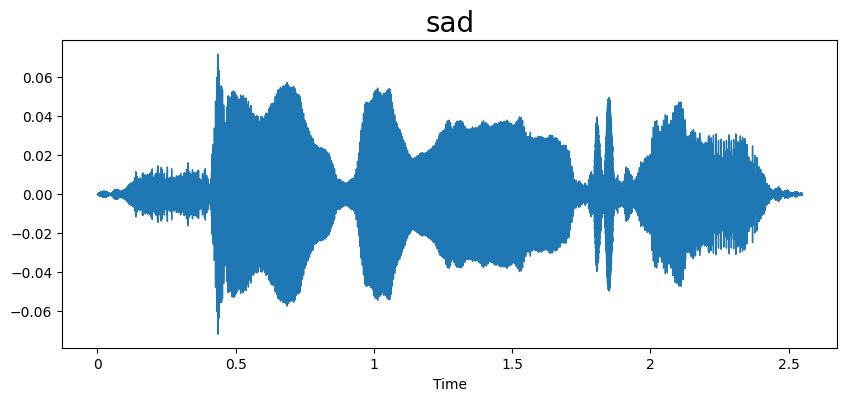

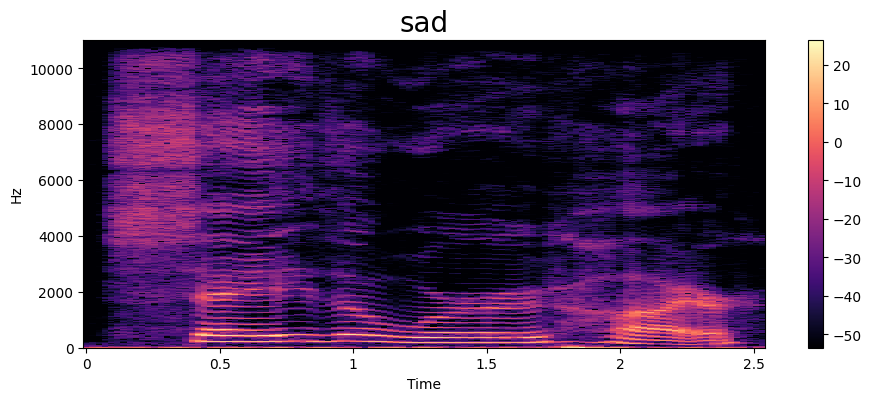

In [21]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

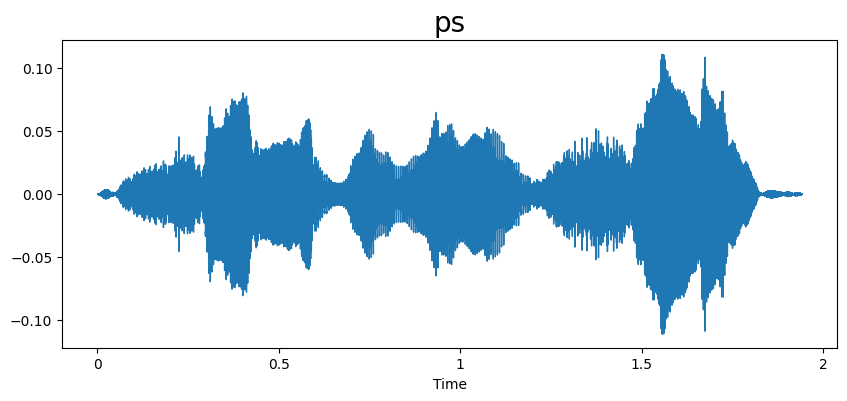

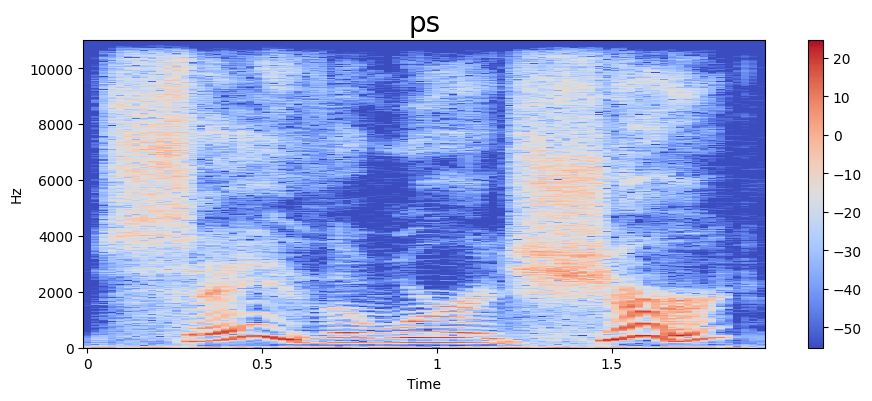

In [22]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

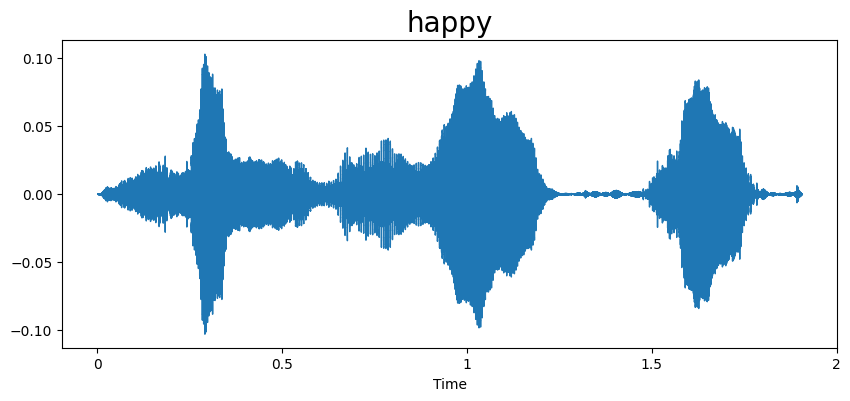

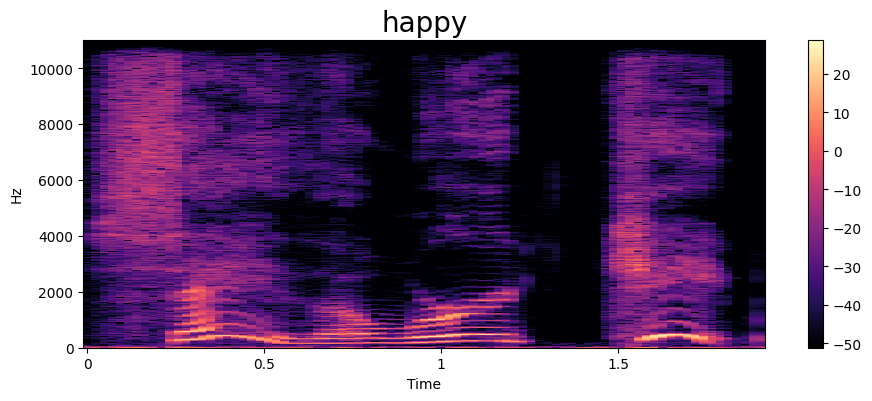

In [23]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
ipd.Audio(path)

In [24]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [25]:
extract_mfcc(df['speech'][0])

array([-5.0587115e+02,  8.2794395e+01,  2.8410505e+01,  4.2824273e+00,
        9.4589291e+00,  8.6772186e-01, -1.9823838e+00, -3.1623302e+00,
       -2.0514957e+01, -3.7712874e+00, -1.5934051e+01, -5.3664260e+00,
       -7.9249086e+00, -2.0551777e+00,  3.2635591e+00,  4.8722534e+00,
        1.7836412e+00,  1.1727112e+01,  2.5498676e+00, -1.2649821e+00,
        2.8612790e+00, -2.2618656e+00, -2.6995912e+00, -7.8695267e-01,
       -5.3314395e+00,  5.2888570e+00, -2.1339917e-01,  9.6756954e+00,
        3.7345433e+00,  8.8631945e+00,  4.7394557e+00,  4.1352539e+00,
        1.5811241e+00,  1.4179065e+00,  3.2663028e+00,  8.6123686e+00,
        2.6770000e+00,  2.7458315e+00,  3.9175348e+00,  1.1014188e+01],
      dtype=float32)

In [26]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [27]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2800, 40)

In [28]:
#input split
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [30]:
y=y.toarray()

In [31]:
y.shape

(2800, 7)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=2, random_state=42)

CREATE A LSTM MODEL

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Choose a different name to avoid overwriting the 'model' function
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
#Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=30)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.2986 - loss: 1.7146 - val_accuracy: 0.5000 - val_loss: 1.0651
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.7469 - loss: 0.6843 - val_accuracy: 1.0000 - val_loss: 0.1489
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.8650 - loss: 0.3910 - val_accuracy: 1.0000 - val_loss: 0.0713
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - accuracy: 0.9001 - loss: 0.2901 - val_accuracy: 1.0000 - val_loss: 0.0113
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.9432 - loss: 0.1932 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - accuracy: 0.9413 - loss: 0.2349 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.9657 - loss: 0.1175 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.9589 - loss: 0.1434 - val_accurac

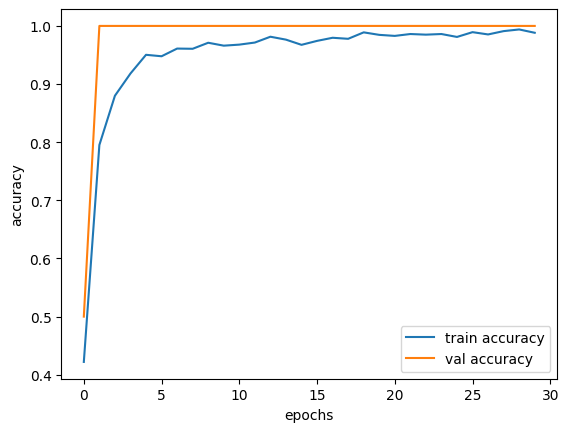

In [35]:
epochs=list(range(30))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

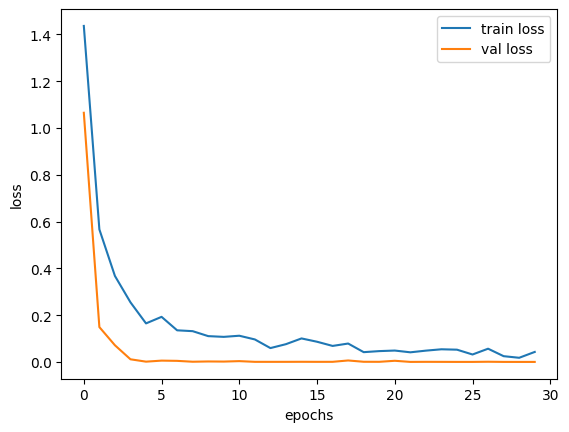

In [36]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
best_train_acc = max(history.history['accuracy'])
best_val_acc = max(history.history['val_accuracy'])
print(f"Best Training Accuracy: {best_train_acc * 100: .2f}%")
print(f"Best Validation Accuracy: {best_val_acc * 100: .2f}%")

Best Training Accuracy:  99.39%
Best Validation Accuracy:  100.00%


In [38]:
best_train_loss = min(history.history['loss'])
best_val_loss = min(history.history['val_loss'])
print(f"Lowest Training Loss: {best_train_loss * 100: .4f}%")
print(f"Lowest Validation Loss: {best_val_loss * 100: .4f}%")

Lowest Training Loss:  1.7750%
Lowest Validation Loss:  0.0058%
